# EDA on Haberman's Cancer Survival Dataset by Juhi Joshi

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of features : 4
1. Age of the patient at the time of the operation
2. Year is the calender year during which the patient was operated
3. Nodes are the number of positive auxillary nodes detected. This means the cancer has spread from the original tumor to the nearest lymph nodes, which are under the arm.
4. Survival status (class attribute)
    1 means the patient survived 5 years or longer
    2 means the patient died within 5 year

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("haberman.csv")

In [9]:
# Number of data points & attributes in the dataset  
print(df.shape)

# The dataset has 306 rows & 4 columns

(306, 4)


In [10]:
# What are those 4 columns?
print(df.columns)

# The 4 columns are age, year, nodes & status

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [11]:
# How many data points of each class is present in the dataset?

print(df['status'].value_counts())

# Status with 1 has 225 data points
# Status with 2 has 81 data points
# The dataset is balanced 

1    225
2     81
Name: status, dtype: int64


In [12]:
# Missing values

df.apply(lambda x: sum(x.isnull()),axis=0)

# There are no missing values


age       0
year      0
nodes     0
status    0
dtype: int64

# Objective : Whether a person with who had undergone surgery for breast cancer lives for 5 years or longer or not. A classification task 

1. Performing univariate analysis to understand each feature in depth

C:\Users\prash\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


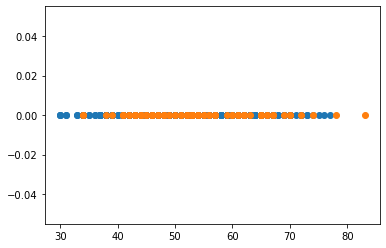

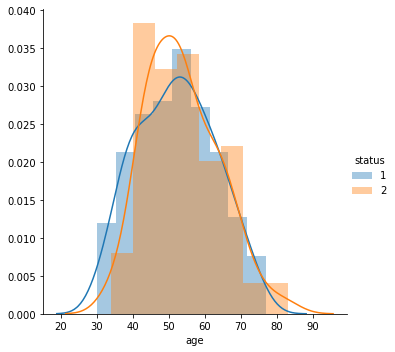

In [19]:
# Histogram for age

import numpy as np
status_1 = df.loc[df["status"] == 1]
status_2 = df.loc[df["status"] == 2]

plt.plot(status_1["age"], np.zeros_like(status_1['age']), 'o')
plt.plot(status_2["age"], np.zeros_like(status_2['age']), 'o')

plt.show()

sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.show()


# The density plot is quite overlapping. The feature age is not linearly separable
# If the patient is operated before the age of 42, then there is higher probability of the survival of the patient for 5 years or more
# If opetated after the age of 42, higher probability of the patient to die within 5 years 

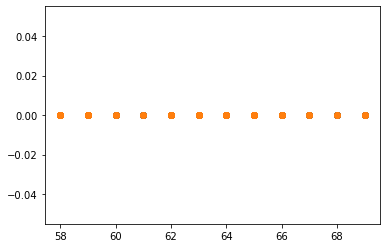

C:\Users\prash\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


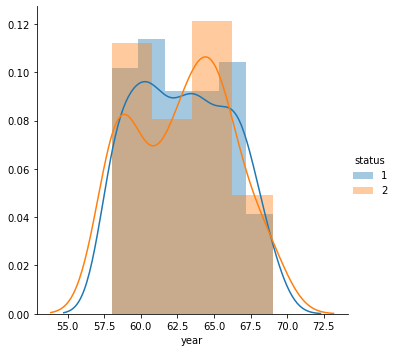

In [20]:
# Histogram for year

import numpy as np
status_1 = df.loc[df["status"] == 1]
status_2 = df.loc[df["status"] == 2]

plt.plot(status_1["year"], np.zeros_like(status_1['year']), 'o')
plt.plot(status_2["year"], np.zeros_like(status_2['year']), 'o')

plt.show()

sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.show()


# The density plot is quite overlapping. The feature year is not linearly separable

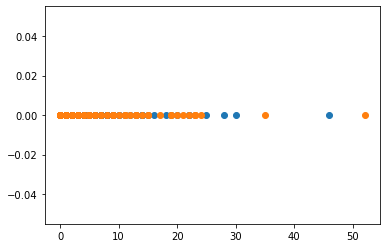

C:\Users\prash\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


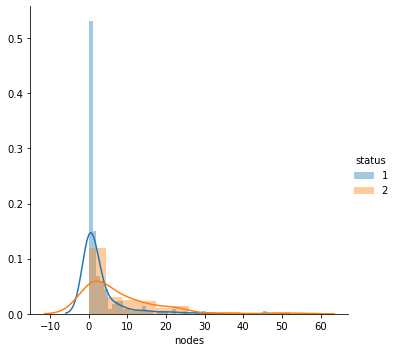

In [23]:
# Histogram for node

import numpy as np
status_1 = df.loc[df["status"] == 1]
status_2 = df.loc[df["status"] == 2]

plt.plot(status_1["nodes"], np.zeros_like(status_1['nodes']), 'o')
plt.plot(status_2["nodes"], np.zeros_like(status_2['nodes']), 'o')

plt.show()

sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.show()


# The density plot is quite overlapping. The feature nodes is not linearly separable
# If the nodes is less than 3, there is a higher probability that the patient will survive for 5 years or more

In [ ]:
# The above three histograms shows that we cannot use a simple if-else condition to separate the class label.

2. Understanding PDF and CDF of these features for patients that survived for 5 years or longer after the operation 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


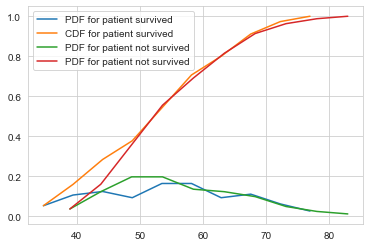

In [44]:
sns.set_style("whitegrid")

counts, bin_edges = np.histogram(status_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF for patient survived")
plt.plot(bin_edges[1:], cdf,label="CDF for patient survived")

counts, bin_edges = np.histogram(status_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF for patient not survived")
plt.plot(bin_edges[1:], cdf, label="PDF for patient not survived")

plt.legend()
plt.show()

# From this we infer that for 50% of the patients that survived for 5 years or longer, the operation was done before the age approx 52 years
# If the patient is operated between the ag eof 40-44, there are higher chances of the survivial.

# Bi-variate Analysis

Pair Plots

C:\Users\prash\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


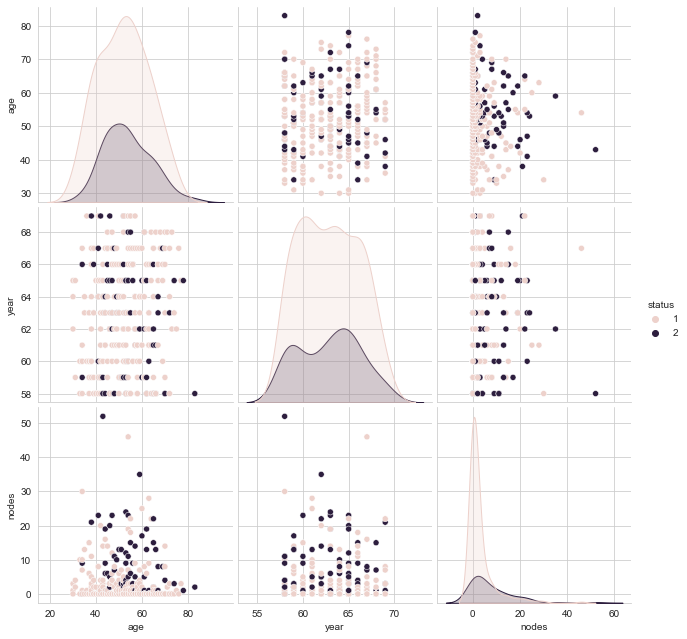

In [46]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="status", size=3)
plt.show()

# We can observe some pattern in the age and nodes plot. These could be important features. However, the year feature seems not that relevent to the objective.

# Box and Whisker Plots

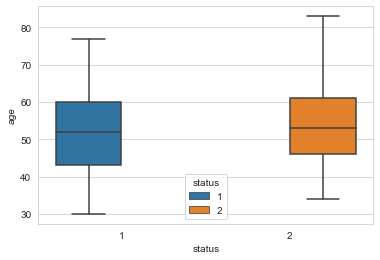

In [53]:
sns.boxplot(x='status',y='age',hue="status", data=df)
plt.show()

# We cannot separate survived & non-survived patients to greater extent. 
# 25% of the patients below age 43 survived for 5 years or longer 

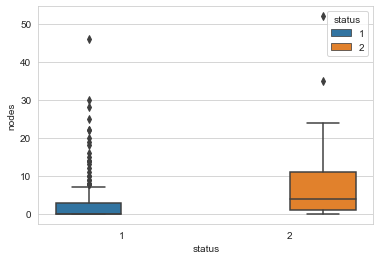

In [54]:
sns.boxplot(x='status',y='nodes',hue="status", data=df)
plt.show()

# Less the number of nodes, greater is the chance of survival for 5 years or longer 
# 75% of the patients that survived for 5 years or longer had less than 3 nodes
# Almost all the patients that survived for 5 years or longer had less than 7-8 nodes.
# There are many outlier too for patients that survived for 5 years or longer

# Violin Plots

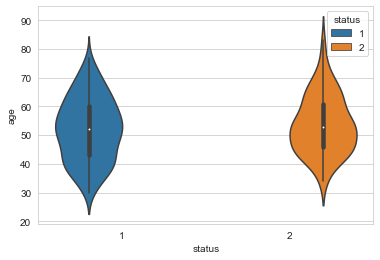

In [55]:
sns.violinplot(x="status", y="age", hue="status", data=df)
plt.show()

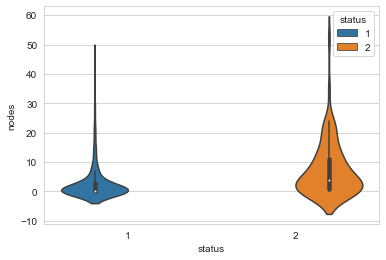

In [56]:
sns.violinplot(x="status", y="nodes", hue="status", data=df)
plt.show()

# the lesser the numbe rof positive auxillary nodes, more are the chances of survival

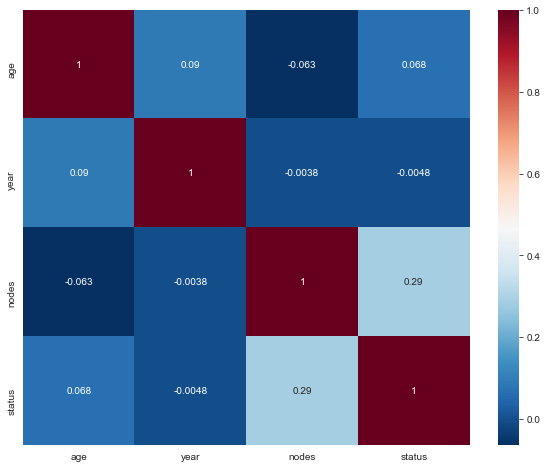

In [59]:
corrs = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

# Strongly correlated features; either dark red (positive) or dark blue(negative).
# This shows age and nodes are negatively correlated features